# Precipitation Modeling

In [8]:
import numpy  as np;
import pandas as pd;
import datetime as dt;
import matplotlib.pyplot as plt;
%matplotlib inline
from matplotlib.pylab import rcParams;
rcParams['figure.figsize']=20,6
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose;
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings('ignore')

# We will work on rainfall data of 
## Meghalaya

Loading the data

In [2]:
rainfall_data_matrix=pd.read_excel('seasonal data.xls', sheetname='Precipitation');

In [3]:
rainfall_data_matrix.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1901,33.114,11.204,57.958,394.103,354.635,852.425,542.652,500.462,453.192,367.423,162.045,0.799
1,1902,2.782,6.657,90.605,378.258,383.527,1131.948,909.062,737.094,511.270,49.961,4.804,0.476
2,1903,4.120,25.975,150.958,262.411,306.847,1001.618,643.331,945.971,188.710,128.980,134.363,0.702
3,1904,5.264,97.920,82.869,821.506,531.668,516.699,534.175,662.378,226.183,102.916,59.392,2.122
4,1905,6.007,16.618,213.213,165.576,521.176,750.385,692.670,1114.727,564.533,534.240,14.350,12.944


In [4]:
rainfall_data_matrix.set_index("Year",inplace=True); #year column set as index
rainfall_data_matrix=rainfall_data_matrix.transpose();
print(rainfall_data_matrix.head())


Year     1901     1902     1903     1904     1905     1906     1907     1908  \
Jan    33.114    2.782    4.120    5.264    6.007   10.355   27.813    9.613   
Feb    11.204    6.657   25.975   97.920   16.618  130.326  115.964   18.706   
Mar    57.958   90.605  150.958   82.869  213.213   85.225  140.092   14.135   
Apr   394.103  378.258  262.411  821.506  165.576  467.650  293.396  215.631   
May   354.635  383.527  306.847  531.668  521.176  299.803  218.131  466.650   

Year     1909     1910  ...     1993     1994     1995     1996     1997  \
Jan    12.284    4.267  ...   42.434   19.733   15.311    3.946    5.799   
Feb    22.341   50.913  ...   94.347   66.616   44.075   36.606   29.578   
Mar     5.579  354.507  ...  168.200  269.284   29.991  299.661   63.122   
Apr   237.478  276.665  ...  149.217  283.816  138.009  306.045  109.238   
May   685.724  355.292  ...  611.599  373.221  418.116  811.986  400.519   

Year     1998     1999     2000     2001     2002  
Jan    11.

In [5]:
dates = pd.date_range(start='1901-01', freq='MS', periods=len(rainfall_data_matrix.columns)*12)
dates

DatetimeIndex(['1901-01-01', '1901-02-01', '1901-03-01', '1901-04-01',
               '1901-05-01', '1901-06-01', '1901-07-01', '1901-08-01',
               '1901-09-01', '1901-10-01',
               ...
               '2002-03-01', '2002-04-01', '2002-05-01', '2002-06-01',
               '2002-07-01', '2002-08-01', '2002-09-01', '2002-10-01',
               '2002-11-01', '2002-12-01'],
              dtype='datetime64[ns]', length=1224, freq='MS')

## Mean precipitation across all years

Text(0.5, 1.0, 'Month vs mean precipitation across all years')

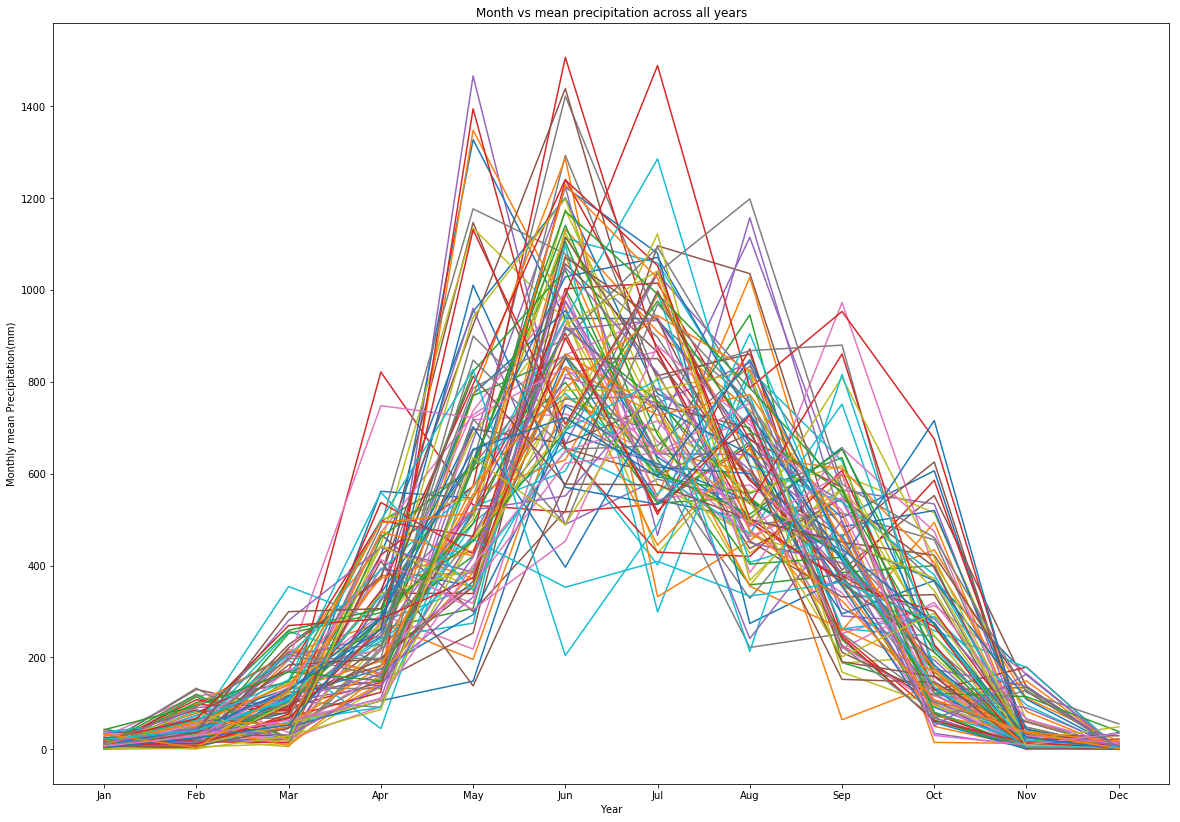

In [366]:
plt.figure(figsize=(20,14))
plt.plot(rainfall_data_matrix)

plt.xlabel('Year')
plt.ylabel('Monthly mean Precipitation(mm)')

plt.title('Month vs mean precipitation across all years')


## Box plot for mean precipitation across all years 

Text(0.5, 1.0, 'Month vs Precipitation across all years')

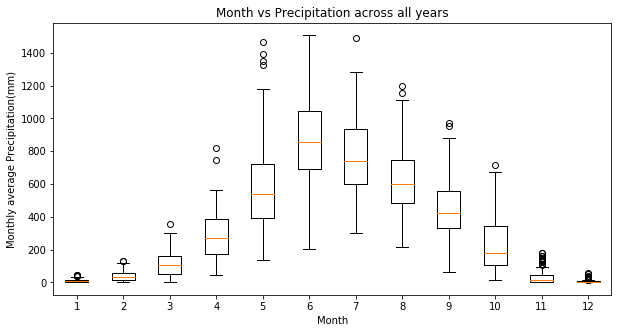

In [6]:
plt.figure(figsize=(10,5))
plt.boxplot(rainfall_data_matrix)
plt.xlabel('Month')
plt.ylabel('Monthly average Precipitation(mm)')
plt.title('Month vs Precipitation across all years')

# Heatmap of rainfall data

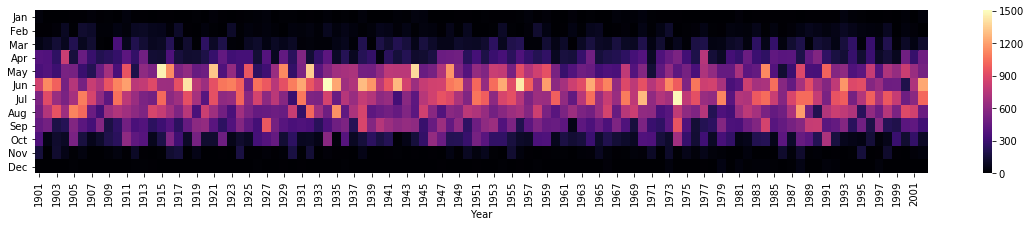

In [23]:
fig=plt.figure(figsize=(20,3))
sns.heatmap(rainfall_data_matrix,cmap='magma',linecolor='white',linewidth=0)

# Hierarchical Clustering

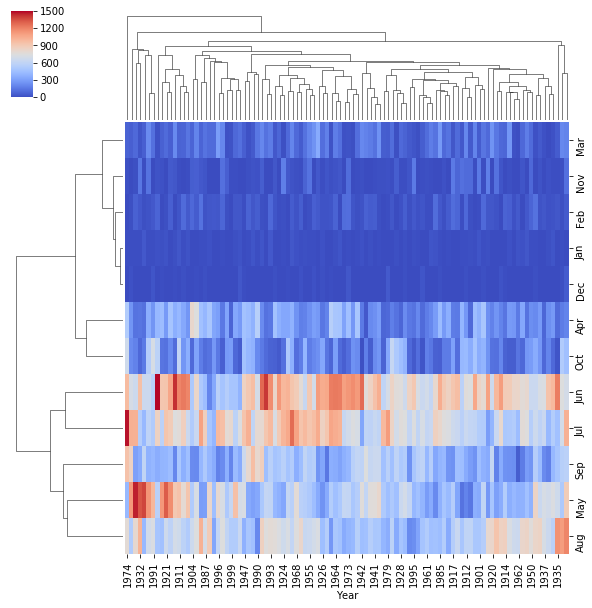

In [25]:
sns.clustermap(rainfall_data_matrix,cmap='coolwarm')

In the above box plot we can see that maximum variation is in month of june that is when monsoon comes to meghalaya.

In [8]:
average_rainfall_year = pd.DataFrame({'average_rainfall_year': rainfall_data_matrix.mean(axis=0)})#creating a dataframe from dictonary.
#axis value 0 means operations are performed column wise.
average_rainfall_year = average_rainfall_year.transpose()
average_rainfall_year.head()

Year,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
average_rainfall_year,310.834333,350.537,316.1655,303.591,383.869917,356.73575,281.590083,256.668417,283.8155,375.18975,...,389.080833,289.60625,271.845,333.470667,260.92675,318.28375,258.355667,304.50525,326.562667,364.24925


Text(0.5, 1.0, 'Year vs Average Precipitation')

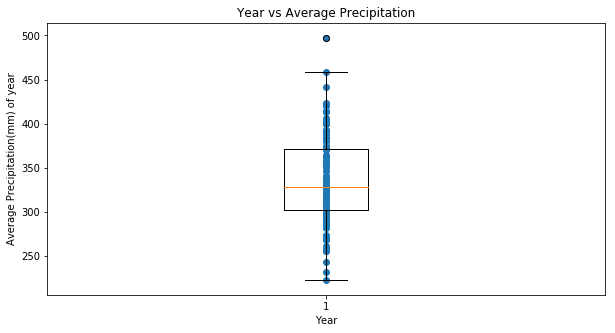

In [66]:
plt.figure(figsize=(10,5))
plt.boxplot(average_rainfall_year)

plt.scatter(x=np.ones(len(average_rainfall_year.columns)), y=average_rainfall_year.ix[0])
plt.xlabel('Year')
plt.ylabel('Average Precipitation(mm) of year')
plt.title('Year vs Average Precipitation')

In [86]:
rainfall_data_matrix_np = rainfall_data_matrix.as_matrix()
#coverted dataframe into numpy matrix so that it can be easly reshaped index and column name are not included in the matrix

shape = rainfall_data_matrix_np.shape
print("shape belore reshaping :",shape)
rainfall_data_matrix_np = np.reshape(rainfall_data_matrix_np,(shape[0] * shape[1], 1),order='F')
print("shape after reshaping :", rainfall_data_matrix_np.shape)

shape belore reshaping : (12, 102)
shape after reshaping : (1224, 1)


Reshaped data are stacked year wise data

# Splitting the data in train and test set
## Train 1901-1981
## Test   1982-2002

In [90]:
rainfall_data = pd.DataFrame({'Precipitation': rainfall_data_matrix_np[:,0]})
rainfall_data.set_index(dates, inplace=True)
#splitting the data into train and test set (80-20)

train_rainfall_data = rainfall_data.ix[: '1981']
test_rainfall_data = rainfall_data.ix['1982':]

print(train_rainfall_data.head())
print(train_rainfall_data.tail())
print(test_rainfall_data.head())
print(test_rainfall_data.tail())

            Precipitation
1901-01-01         33.114
1901-02-01         11.204
1901-03-01         57.958
1901-04-01        394.103
1901-05-01        354.635
            Precipitation
1981-08-01        642.356
1981-09-01        354.557
1981-10-01         58.325
1981-11-01          0.372
1981-12-01         35.997
            Precipitation
1982-01-01          0.253
1982-02-01         30.446
1982-03-01         45.946
1982-04-01        473.012
1982-05-01        420.875
            Precipitation
2002-08-01        474.619
2002-09-01        323.075
2002-10-01        108.053
2002-11-01         36.445
2002-12-01          1.096


# Visualization of rainfall data 

Text(0.5, 1.0, 'Monthly mean Precipitation(mm) across years')

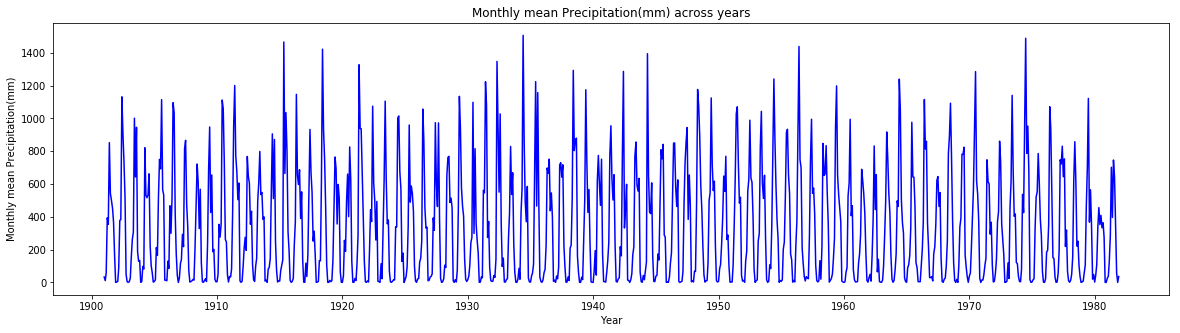

In [92]:
plt.figure(figsize=(20,5))
plt.plot(train_rainfall_data, color='blue')
plt.xlabel('Year')
plt.ylabel('Monthly mean Precipitation(mm)')
plt.title('Monthly mean Precipitation(mm) across years')

# Zoomed in visualzation for first 5 years

Text(0.5, 1.0, 'Monthly mean Precipitation(mm) across years')

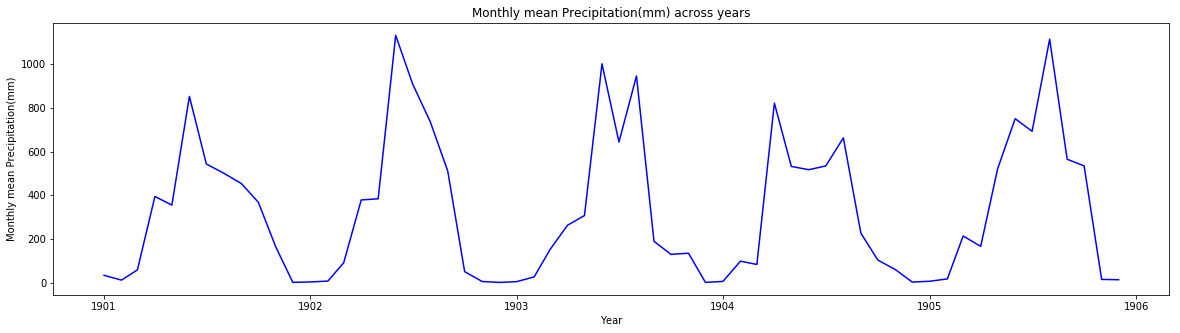

In [93]:
plt.figure(figsize=(20,5))
plt.plot(train_rainfall_data.ix[:60], color='blue')
plt.xlabel('Year')
plt.ylabel('Monthly mean Precipitation(mm)')
plt.title('Monthly mean Precipitation(mm) across years')

# Decomposition os rainfall data

In [95]:
decomposition = sm.tsa.seasonal_decompose(rainfall_data, model='additive')

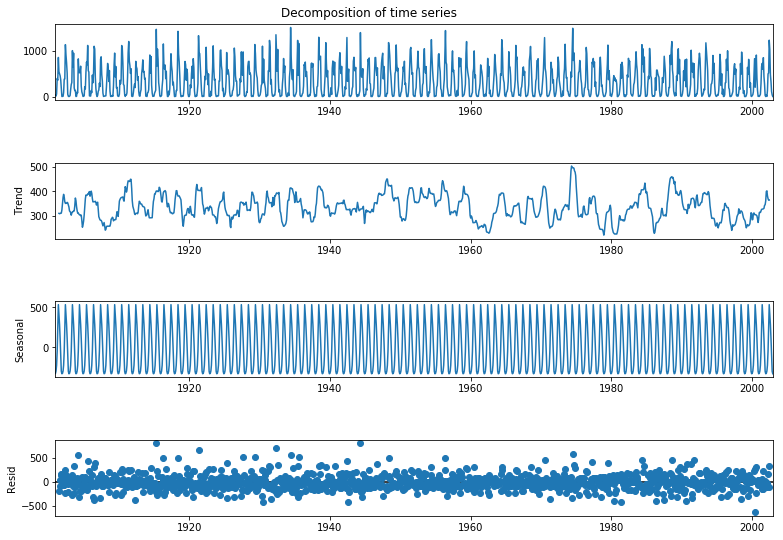

In [96]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of time series')
plt.show()

# Stationarity:
A time series is said to be stationary if its statistical properties such as mean, variance remain constant over time.
The basic assumption before applying different models like ARIMA is that the time series should be stationary.
How to formally check stationarity?
There are two tests to check whether a time series is stationary or not.
## Rolling statistics (Visual test) - 
We can plot the moving average or moving variance and see if it varies with time. By moving average/variance we mean that at any instant 't', we'll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.
## Dickey Fuller test - 
This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

In [377]:
def test_stationary(timeseries, window=12):
    
    # Rolling statistics
    movingAverage = timeseries.rolling(window=window).mean()
    movingSTD = timeseries.rolling(window=window).std()
    
    # Plot rolling statistics
    plt.figure(figsize=(20,5))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation\n')
    plt.show(block=False)
    
    # Dickey Fuller test
    print('Results of Dickey Fuller Test:\n')
    dftest = adfuller(timeseries.iloc[:,0], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'No. of Lags used', 'Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

# Testing the stationarity of data

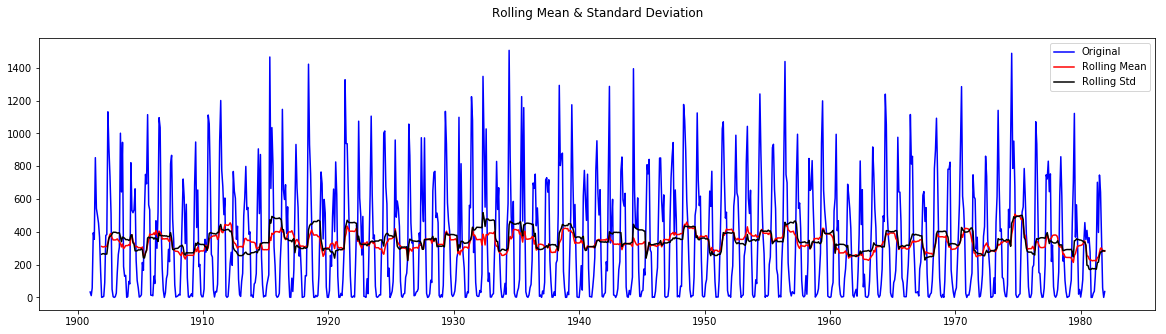

Results of Dickey Fuller Test:

Test Statistic                -6.171518e+00
p-value                        6.787237e-08
No. of Lags used               2.200000e+01
Number of observations used    9.490000e+02
Critical Value (1%)           -3.437259e+00
Critical Value (5%)           -2.864590e+00
Critical Value (10%)          -2.568394e+00
dtype: float64


In [378]:
test_stationary(train_rainfall_data, window=12)

# Analysis
As we could see, p-value is very less. Also, "Test statistic" is less compared to "Critical Value".
Therefore, Null hypothesis is rejected, which means, Time series is stationary.
Next steps:
As time series is stationary, differencing is not required.
Now, we have to find p and q values by plotting ACF and PACF plots.

# ACF and PACF plots

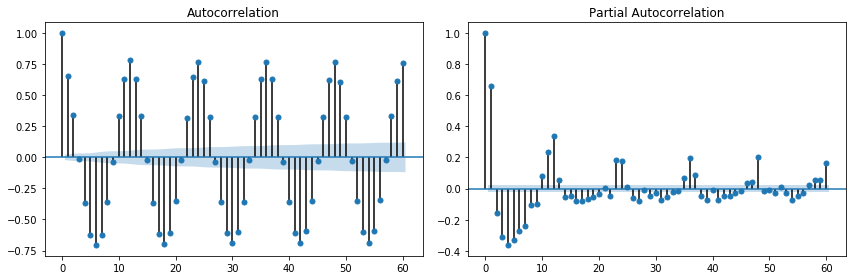

In [379]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(train_rainfall_data, lags=60, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(train_rainfall_data, lags=60, ax=axes[1], alpha=0.5)
plt.tight_layout()

# Apply Differencing D = 1

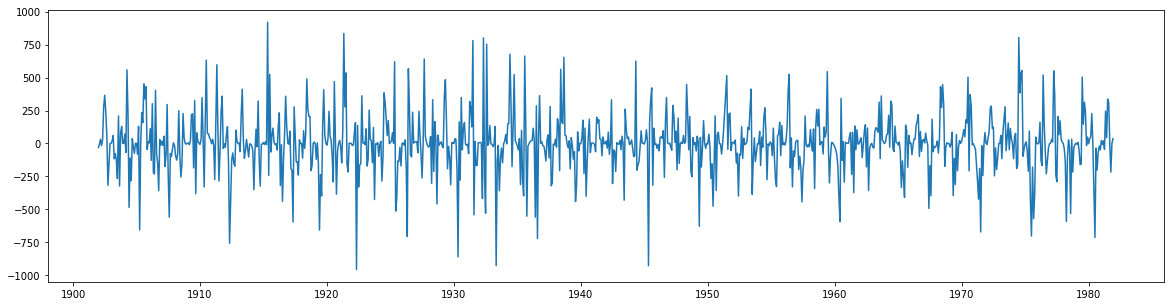

In [380]:
diff_12 = train_rainfall_data.diff(periods=12)
diff_12.dropna(inplace=True)

plt.figure(figsize=(20,5))
plt.plot(diff_12)

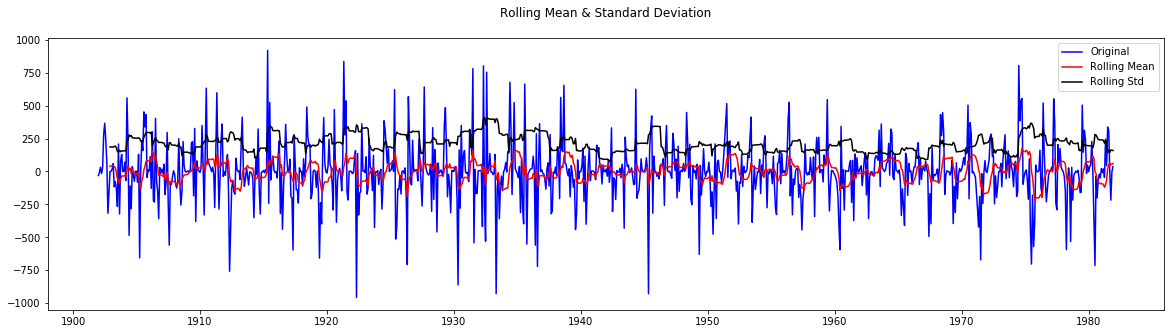

Results of Dickey Fuller Test:

Test Statistic                -1.029010e+01
p-value                        3.588794e-18
No. of Lags used               1.400000e+01
Number of observations used    9.450000e+02
Critical Value (1%)           -3.437289e+00
Critical Value (5%)           -2.864603e+00
Critical Value (10%)          -2.568401e+00
dtype: float64


In [381]:
test_stationary(diff_12)

If there is seasonality, it will be better if we try all combinations of different parameters and choose the best set ofparameters that gives less AIC score.

# Parameters - p, d, q, P, D, Q

In [114]:
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(1, 3);
d=range(0,2);

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [118]:
pdq
# it is a list of tuples

[(1, 0, 1),
 (1, 0, 2),
 (1, 1, 1),
 (1, 1, 2),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 1),
 (2, 1, 2)]

In [119]:
seasonal_pdq
# it is a list of tuples

[(1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12)]

In [120]:
AIC_scores_list = []
print("Total Steps",len(pdq)*len(seasonal_pdq))
# this gives total steps as function is a combination of pdq, seasonal_pdq

Total Steps 64


# Finding the best parameters
We iterate through all possible parameters combination and find the best parameter combination corresponding that is giving the best result- best AIC score or best R sqaure value.
    *Best AIC score- Least Value of AIC
    *Best R squared value- maximum value of R squared value The coefficient of determination or R squared, is a statistical measure of how close the data pairs in a set are to their fitted regression line. This measure ranges from 0 to 1, indicating the extent to which the dependent variable in a data set is predictable. An R squared of 0 means that the dependent variable cannot be predicted by the independent variable, while an R squared of 1 means that it can be predicted without error.

In [121]:
best_aic = np.inf # setting aic value to maximum
best_pdq = None
best_seasonal_pdq = None
temp_model = None
best_model=None
total_steps=len(pdq)*len(seasonal_pdq);
print("Total Steps",total_steps)
i=1;
for param in pdq:
    for param_seasonal in seasonal_pdq:        
        try:
            print("Step",i,"of",total_steps)
            i=i+1;
            temp_model = sm.tsa.statespace.SARIMAX(train_rainfall_data,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            results = temp_model.fit()
            l = []
            l.append(param[0])
            l.append(param[1])
            l.append(param[2])
            l.append(param_seasonal[0])
            l.append(param_seasonal[1])
            l.append(param_seasonal[2])
            l.append(param_seasonal[3])
            l.append(results.aic)
            AIC_scores_list.append(l)
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_model=temp_model
        except:
            continue

print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Total Steps 64
Step 1 of 64
Step 2 of 64
Step 3 of 64
Step 4 of 64
Step 5 of 64
Step 6 of 64
Step 7 of 64
Step 8 of 64
Step 9 of 64
Step 10 of 64
Step 11 of 64
Step 12 of 64
Step 13 of 64
Step 14 of 64
Step 15 of 64
Step 16 of 64
Step 17 of 64
Step 18 of 64
Step 19 of 64
Step 20 of 64
Step 21 of 64
Step 22 of 64
Step 23 of 64
Step 24 of 64
Step 25 of 64
Step 26 of 64
Step 27 of 64
Step 28 of 64
Step 29 of 64
Step 30 of 64
Step 31 of 64
Step 32 of 64
Step 33 of 64
Step 34 of 64
Step 35 of 64
Step 36 of 64
Step 37 of 64
Step 38 of 64
Step 39 of 64
Step 40 of 64
Step 41 of 64
Step 42 of 64
Step 43 of 64
Step 44 of 64
Step 45 of 64
Step 46 of 64
Step 47 of 64
Step 48 of 64
Step 49 of 64
Step 50 of 64
Step 51 of 64
Step 52 of 64
Step 53 of 64
Step 54 of 64
Step 55 of 64
Step 56 of 64
Step 57 of 64
Step 58 of 64
Step 59 of 64
Step 60 of 64
Step 61 of 64
Step 62 of 64
Step 63 of 64
Step 64 of 64
Best SARIMAX(1, 0, 1)x(1, 1, 2, 12)12 model - AIC:12520.096581354263


In [123]:
AIC_scores = pd.DataFrame.from_records(AIC_scores_list)
AIC_scores.columns=['p', 'd', 'q', 'P', 'D', 'Q', 's', 'AIC']
AIC_scores.iloc[AIC_scores['AIC'].argmin()] #finding parameters with minimum AIC value

p          1.000000
d          0.000000
q          1.000000
P          1.000000
D          1.000000
Q          2.000000
s         12.000000
AIC    12520.096581
Name: 3, dtype: float64

In [124]:
AIC_scores

,p,d,q,P,D,Q,s,AIC
0,1,0,1,1,0,1,12,12697.604424
1,1,0,1,1,0,2,12,12712.770826
2,1,0,1,1,1,1,12,12526.510763
3,1,0,1,1,1,2,12,12520.096581
4,1,0,1,2,0,1,12,12703.124431
5,1,0,1,2,1,1,12,12528.437271
6,1,0,1,2,1,2,12,12521.593752
7,1,0,2,1,0,1,12,12703.553587
8,1,0,2,1,0,2,12,12937.404716
9,1,0,2,1,1,1,12,12530.628342


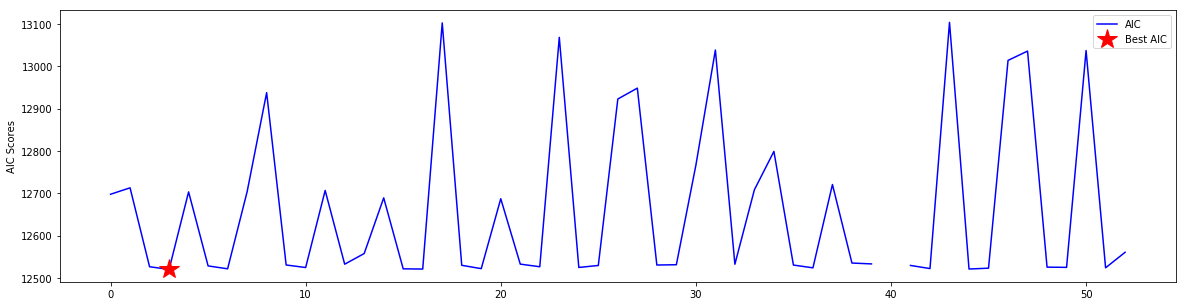

In [383]:
plt.figure(figsize=(20,5))
plt.plot(AIC_scores.AIC, color='blue',label="AIC")
plt.plot(3, AIC_scores.AIC[3], 'r*',markersize=20,label="Best AIC")
plt.ylabel("AIC Scores")
plt.legend(loc="best")

# Analysis:
After fitting the data with different combination of models, we got the best parameters as following:
p = 2, d = 1, q = 1
P = 2, D = 1, Q = 1
s = 12

In [126]:
best_pdq = (1, 0, 1)
best_seasonal_pdq = (1, 1, 2, 12)

In [127]:
best_model = sm.tsa.statespace.SARIMAX(train_rainfall_data,
                                      order=best_pdq,
                                      seasonal_order=best_seasonal_pdq,
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
best_results = best_model.fit()

In [128]:
print(best_results.summary())

                                        SARIMAX Results                                        
Dep. Variable:                           Precipitation   No. Observations:                  972
Model:             SARIMAX(1, 0, 1)x(1, 1, [1, 2], 12)   Log Likelihood               -6254.048
Date:                                 Sun, 22 Mar 2020   AIC                          12520.097
Time:                                         17:07:21   BIC                          12549.298
Sample:                                     01-01-1901   HQIC                         12531.217
                                          - 12-01-1981                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6274      0.329      1.908      0.056      -0.017       1

# Finding the best fitting line

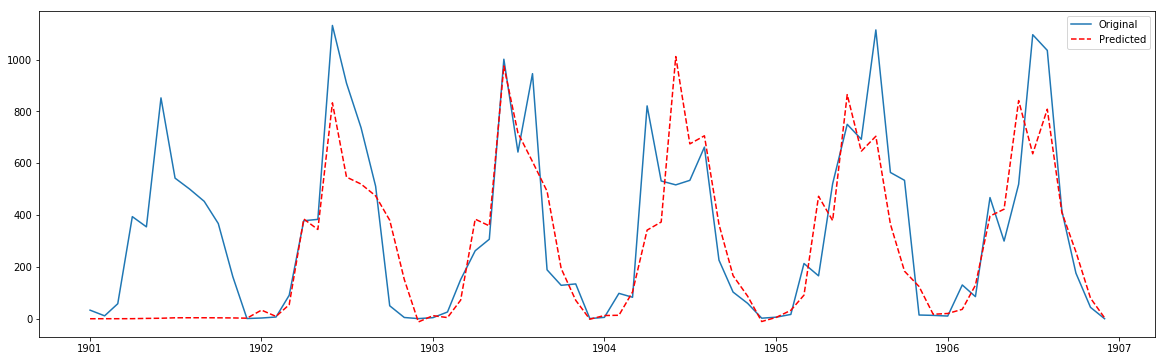

In [133]:
plt.plot(train_rainfall_data.head(72),label="Original");
plt.plot(best_results.fittedvalues.head(72),color='red',linestyle='--',label="Predicted");
plt.legend(loc="best");

In [298]:
fitted_rainfall_data=best_results.fittedvalues
print("fitted Values")
print(fitted_rainfall_data.head())

print(fitted_rainfall_data.tail())
print("original values")
print(train_rainfall_data.head())
print(train_rainfall_data.tail())

fitted Values
1901-01-01    0.000000
1901-02-01    0.096792
1901-03-01    0.092699
1901-04-01    0.226036
1901-05-01    1.287853
Freq: MS, dtype: float64
1981-08-01    551.269897
1981-09-01    399.284629
1981-10-01    251.192592
1981-11-01     19.951658
1981-12-01     -3.853631
Freq: MS, dtype: float64
original values
            Precipitation
1901-01-01         33.114
1901-02-01         11.204
1901-03-01         57.958
1901-04-01        394.103
1901-05-01        354.635
            Precipitation
1981-08-01        642.356
1981-09-01        354.557
1981-10-01         58.325
1981-11-01          0.372
1981-12-01         35.997


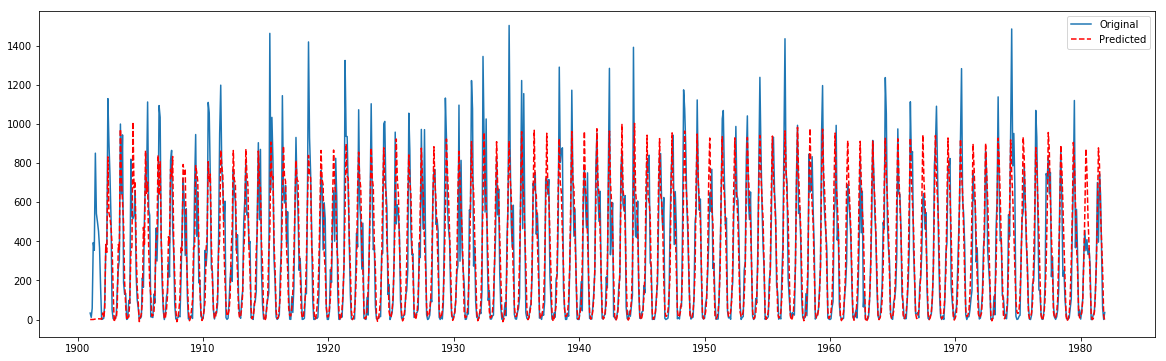

In [299]:
plt.plot(train_rainfall_data,label="Original");
plt.plot(best_results.fittedvalues,color='red',linestyle='--',label="Predicted");
plt.legend(loc="best");

# Dynamic Predictions
The dynamic keyword affects in-sample prediction. If dynamic is False, then the in-sample lagged values are used for prediction. If dynamic is True, then in-sample forecasts are used in place of lagged dependent variables. The first forecast value is start .
# In sample and Out sample
In-sample is data that you know at the time of modell builing and that you use to build that model. Out-of-sample is data that was unseen and you only produce the prediction/forecast one it. Under most circumnstances the model will perform worse out-of-sample than in-sample where all parameters have been calibrated.

In [296]:
pred_rainfall_data = best_results.get_prediction(start=pd.to_datetime('1982-01-01'),end=pd.to_datetime('2002-12-01'), dynamic=False, full_results=True)
pred_rainfall_data_ci = pred_rainfall_data.conf_int(alpha=0.01)
print(train_rainfall_data.head())


            Precipitation
1901-01-01         33.114
1901-02-01         11.204
1901-03-01         57.958
1901-04-01        394.103
1901-05-01        354.635


In [297]:
print("Predicted Values")
print(pred_rainfall_data.predicted_mean.head())
print(pred_rainfall_data.predicted_mean.tail())
print('\n')
print("Fitted Values")
print(fitted_rainfall_data.head())
print(fitted_rainfall_data.tail())

Predicted Values
1982-01-01      6.873176
1982-02-01     30.760322
1982-03-01     96.381477
1982-04-01    304.979479
1982-05-01    552.928718
Freq: MS, dtype: float64
2002-08-01    559.713130
2002-09-01    407.993567
2002-10-01    229.433176
2002-11-01     33.230002
2002-12-01     10.153173
Freq: MS, dtype: float64


Fitted Values
1901-01-01    0.000000
1901-02-01    0.096792
1901-03-01    0.092699
1901-04-01    0.226036
1901-05-01    1.287853
Freq: MS, dtype: float64
1981-08-01    551.269897
1981-09-01    399.284629
1981-10-01    251.192592
1981-11-01     19.951658
1981-12-01     -3.853631
Freq: MS, dtype: float64


# Forecasting the future values

In [240]:
# Get forecast 252 steps (21 years) ahead in future
n_steps = 252
pred_uc_95 = best_results.get_forecast(steps=n_steps) # alpha=0.05 95% Confidence Interval
print(pred_uc_95.predicted_mean.head())
# Get confidence intervals 95% of the forecasts
pred_ci_95 = pred_uc_95.conf_int(alpha=0.05)

print(pred_ci_95.head())

1982-01-01      6.873176
1982-02-01     30.760322
1982-03-01     96.381477
1982-04-01    304.979479
1982-05-01    552.928718
Freq: MS, dtype: float64
            lower Precipitation  upper Precipitation
1982-01-01          -308.866907           322.613258
1982-02-01          -285.546519           347.067163
1982-03-01          -220.148181           412.911134
1982-04-01           -11.637844           621.596802
1982-05-01           236.276893           869.580542


In [241]:
index = pd.date_range(train_rainfall_data.index[-1] + 1, periods=n_steps, freq='MS')
print(index)
forecast_data = pd.DataFrame(np.column_stack([pred_uc_95.predicted_mean, pred_ci_95]), 
                     index=index, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
print("HEAD")
print(forecast_data.head())
print("TAIL")
print(forecast_data.tail())

DatetimeIndex(['1982-01-01', '1982-02-01', '1982-03-01', '1982-04-01',
               '1982-05-01', '1982-06-01', '1982-07-01', '1982-08-01',
               '1982-09-01', '1982-10-01',
               ...
               '2002-03-01', '2002-04-01', '2002-05-01', '2002-06-01',
               '2002-07-01', '2002-08-01', '2002-09-01', '2002-10-01',
               '2002-11-01', '2002-12-01'],
              dtype='datetime64[ns]', length=252, freq='MS')
HEAD
              forecast  lower_ci_95  upper_ci_95
1982-01-01    6.873176  -308.866907   322.613258
1982-02-01   30.760322  -285.546519   347.067163
1982-03-01   96.381477  -220.148181   412.911134
1982-04-01  304.979479   -11.637844   621.596802
1982-05-01  552.928718   236.276893   869.580542
TAIL
              forecast  lower_ci_95  upper_ci_95
2002-08-01  559.713130   230.071909   889.354350
2002-09-01  407.993567    78.352344   737.634790
2002-10-01  229.433176  -100.208047   559.074399
2002-11-01   33.230002  -296.411219   362.871223


# Forecast from 1982-2002

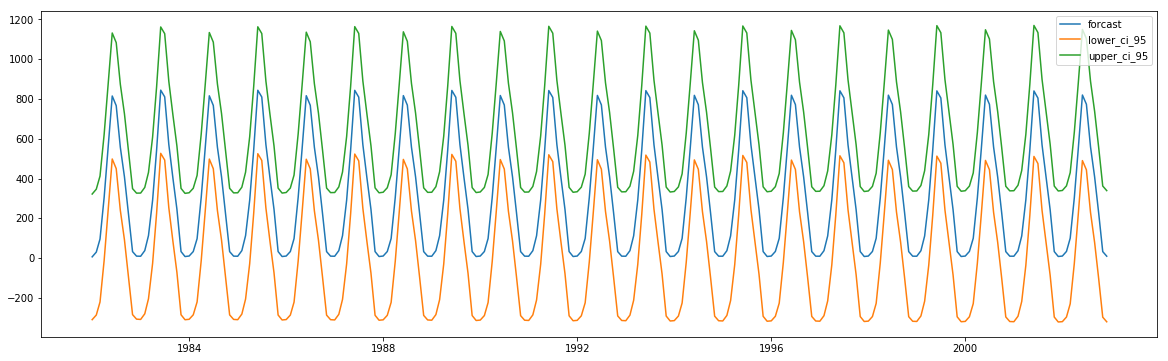

In [300]:
[a,b,c]=plt.plot(forecast_data[['forecast','lower_ci_95','upper_ci_95']])
plt.legend([a,b,c],['forcast', 'lower_ci_95' , 'upper_ci_95'],loc='best')

In [304]:
forecast_rainfall_data=forecast_data["forecast"]
print("predicted rainfall data")
print(pred_rainfall_data.predicted_mean.head())
print("forecasted rainfall data")
print(forecast_rainfall_data.head())

predicted rainfall data
1982-01-01      6.873176
1982-02-01     30.760322
1982-03-01     96.381477
1982-04-01    304.979479
1982-05-01    552.928718
Freq: MS, dtype: float64
forecasted rainfall data
1982-01-01      6.873176
1982-02-01     30.760322
1982-03-01     96.381477
1982-04-01    304.979479
1982-05-01    552.928718
Freq: MS, Name: forecast, dtype: float64


In [307]:
import math
mse = math.sqrt(((np.array(best_results.fittedvalues) - np.array(train_rainfall_data)) ** 2).mean())
print('The Mean Squared Error of our predictions is {}'.format(round(mse, 4)))

The Mean Squared Error of our predictions is 458.4411


In [326]:
#pred_rainfall_data.predicted_mean.index=["Precipitation"]
pred_mean_rainfall_data=pred_rainfall_data.predicted_mean
pred_mean_rainfall_data.columns=["Precipiatation"]
print("predicted rainfall data")
print(pred_mean_rainfall_data.head())
print("original rainfall data")
print(test_rainfall_data.head())


predicted rainfall data
1982-01-01      6.873176
1982-02-01     30.760322
1982-03-01     96.381477
1982-04-01    304.979479
1982-05-01    552.928718
Freq: MS, dtype: float64
original rainfall data
            Precipitation
1982-01-01          0.253
1982-02-01         30.446
1982-03-01         45.946
1982-04-01        473.012
1982-05-01        420.875
[['Precipiatation']]


Text(0, 0.5, 'Precipitation in mm')

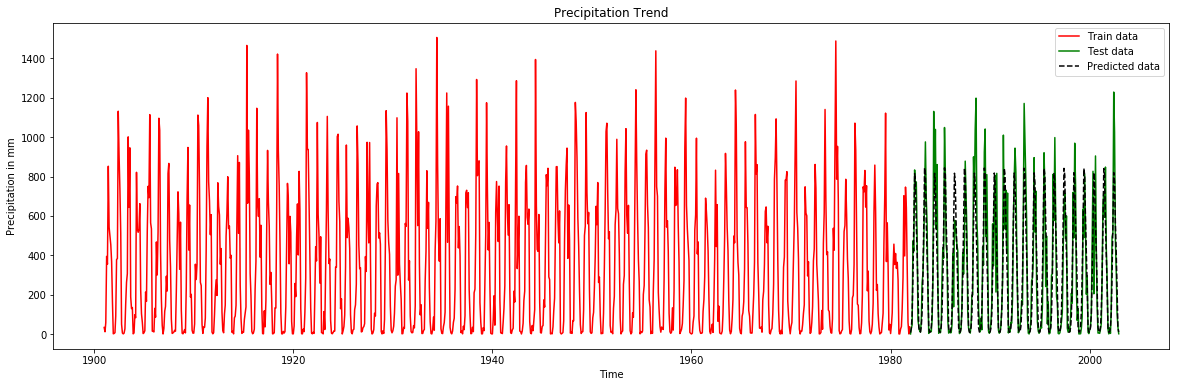

In [328]:
fig=plt.figure(figsize=(20,6));
plt.plot(train_rainfall_data,color='red',label="Train data")
plt.plot(test_rainfall_data,color="green",label="Test data")
plt.plot(pred_mean_rainfall_data,color="black",linestyle="--",label="Predicted data")
plt.legend(loc="best")
plt.title("Precipitation Trend")
plt.xlabel("Time")
plt.ylabel("Precipitation in mm")

Text(0, 0.5, 'Precipitation in mm')

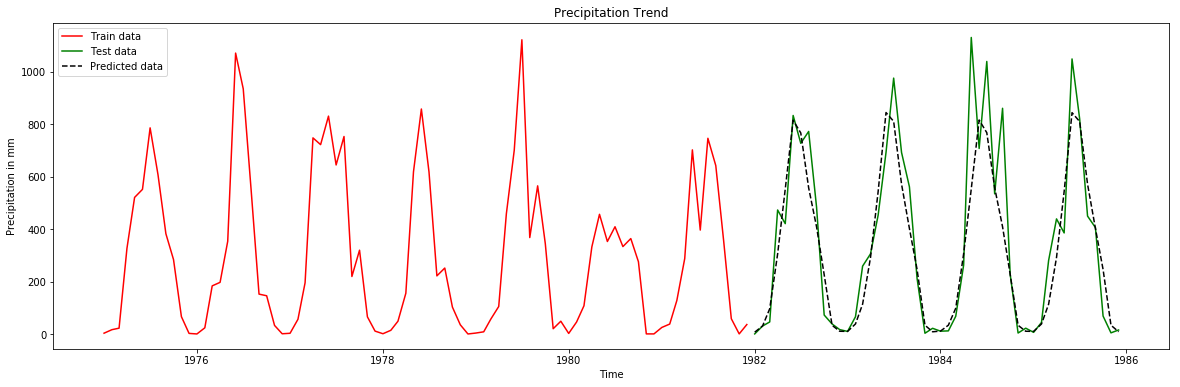

In [331]:
fig=plt.figure(figsize=(20,6));
plt.plot(train_rainfall_data['1975':],color='red',label="Train data")
plt.plot(test_rainfall_data[:'1985'],color="green",label="Test data")
plt.plot(pred_mean_rainfall_data[:'1985'],color="black",linestyle="--",label="Predicted data")
plt.legend(loc="best")
plt.title("Precipitation Trend")
plt.xlabel("Time")
plt.ylabel("Precipitation in mm")

Text(0, 0.5, 'Precipitation in mm')

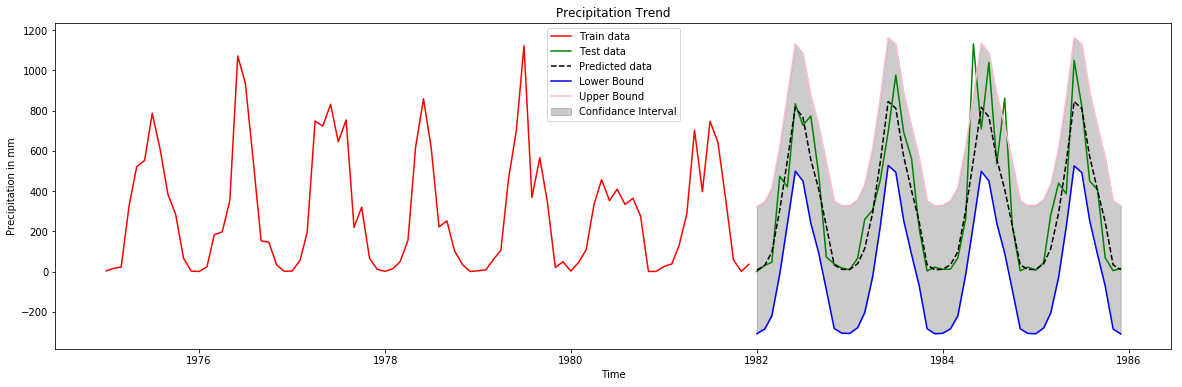

In [364]:
fig=plt.figure(figsize=(20,6));
plt.plot(train_rainfall_data['1975':],color='red',label="Train data")
plt.plot(test_rainfall_data[:'1985'],color="green",label="Test data")
plt.plot(pred_mean_rainfall_data[:'1985'],color="black",linestyle="--",label="Predicted data")
plt.plot(pred_ci_95[:'1985']["lower Precipitation"],color='blue',label="Lower Bound")
plt.plot(pred_ci_95[:'1985']["upper Precipitation"],color='pink',label="Upper Bound")
index = pd.date_range('1982-01-01', periods=48, freq='MS')
plt.fill_between(index,pred_ci_95.loc[:'1985-12-01']['lower Precipitation'],pred_ci_95.loc[:'1985-12-01'][ 'upper Precipitation'], color='k', alpha=0.2,label="Confidance Interval")
plt.legend(loc="best")
plt.title("Precipitation Trend")
plt.xlabel("Time")
plt.ylabel("Precipitation in mm")

# END